In [9]:
import pandas as pd
datos = pd.read_csv("Entrenamieto_ECI_2020.csv")
gp = datos.loc[:, ['Opportunity_Type', 'Stage']]
counts = gp.groupby(['Opportunity_Type'])[['Stage']].count().reset_index().rename(columns = {'Stage' : 'Number_of_Apparitions'})
# Me quedo solo con los datos que tienen al menos 15 apariciones
counts = counts.loc[counts.Number_of_Apparitions >= (counts.Number_of_Apparitions.median())]
counts

,Opportunity_Type,Number_of_Apparitions
1,Opportunity_Type_1,6819
2,Opportunity_Type_10,34
4,Opportunity_Type_12,279
6,Opportunity_Type_14,15
11,Opportunity_Type_19,1900
12,Opportunity_Type_2,70
13,Opportunity_Type_20,175
18,Opportunity_Type_3,275
19,Opportunity_Type_4,51
20,Opportunity_Type_5,14


In [10]:
gp = gp.groupby("Opportunity_Type")["Stage"].value_counts(normalize = True).to_frame()
gp = gp.rename(columns = {'Stage' : 'Rate'}).reset_index()
# Me quedo solo con los casos exitosos
gp = gp.loc[gp.Stage == "Closed Won", ['Opportunity_Type', 'Rate']]
gp

,Opportunity_Type,Rate
0,Opportunity_Type_0,0.750000
2,Opportunity_Type_1,0.530430
7,Opportunity_Type_10,0.705882
10,Opportunity_Type_11,0.333333
11,Opportunity_Type_12,0.928315
14,Opportunity_Type_14,0.733333
17,Opportunity_Type_15,0.333333
19,Opportunity_Type_17,1.000000
21,Opportunity_Type_18,0.181818
23,Opportunity_Type_19,0.210000


In [11]:
# Mergeo ambos df
merged = counts.merge(gp, on='Opportunity_Type', how='inner')
merged

,Opportunity_Type,Number_of_Apparitions,Rate
0,Opportunity_Type_1,6819,0.530430
1,Opportunity_Type_10,34,0.705882
2,Opportunity_Type_12,279,0.928315
3,Opportunity_Type_14,15,0.733333
4,Opportunity_Type_19,1900,0.210000
5,Opportunity_Type_2,70,0.328571
6,Opportunity_Type_20,175,0.205714
7,Opportunity_Type_3,275,0.512727
8,Opportunity_Type_4,51,0.411765
9,Opportunity_Type_5,14,0.571429


In [12]:
top_10 = merged.nlargest(10, 'Rate')
top_10

,Opportunity_Type,Number_of_Apparitions,Rate
2,Opportunity_Type_12,279,0.928315
3,Opportunity_Type_14,15,0.733333
1,Opportunity_Type_10,34,0.705882
11,Opportunity_Type_8,1458,0.702332
10,Opportunity_Type_7,5763,0.683845
9,Opportunity_Type_5,14,0.571429
0,Opportunity_Type_1,6819,0.530430
7,Opportunity_Type_3,275,0.512727
8,Opportunity_Type_4,51,0.411765
12,Opportunity_Type_9,23,0.347826


In [13]:
top10 = top_10.set_index('Opportunity_Type')['Rate']
top10

Opportunity_Type
Opportunity_Type_12    0.928315
Opportunity_Type_14    0.733333
Opportunity_Type_10    0.705882
Opportunity_Type_8     0.702332
Opportunity_Type_7     0.683845
Opportunity_Type_5     0.571429
Opportunity_Type_1     0.530430
Opportunity_Type_3     0.512727
Opportunity_Type_4     0.411765
Opportunity_Type_9     0.347826
Name: Rate, dtype: float64

In [14]:
opp_names = top10.index.tolist()
for i in range(0, len(opp_names)):
    opp_names[i] = opp_names[i].replace('_', ' ')
opp_names

['Opportunity Type 12',
 'Opportunity Type 14',
 'Opportunity Type 10',
 'Opportunity Type 8',
 'Opportunity Type 7',
 'Opportunity Type 5',
 'Opportunity Type 1',
 'Opportunity Type 3',
 'Opportunity Type 4',
 'Opportunity Type 9']

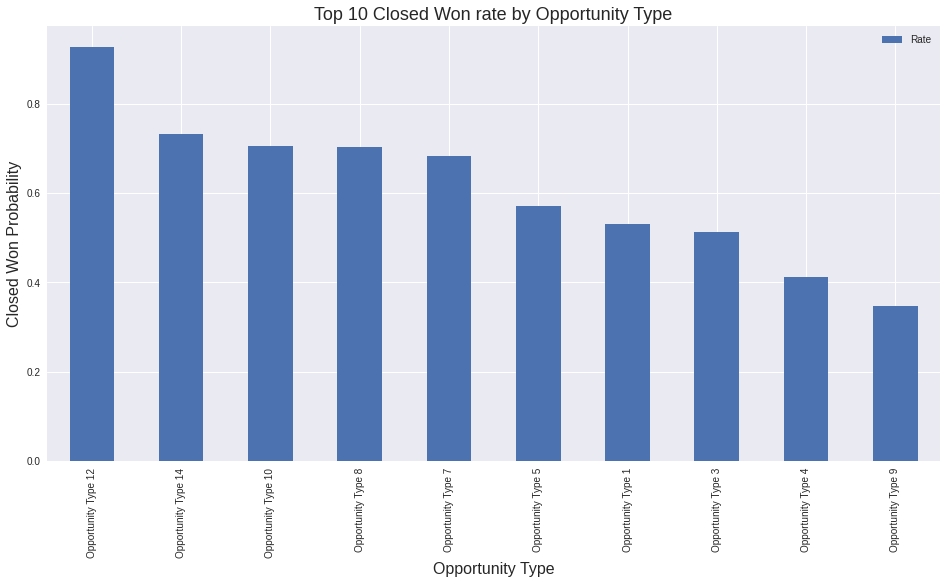

In [15]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
top_10[['Opportunity_Type', 'Rate']].plot(kind="bar", figsize=(16, 8), orientation = 'vertical')
style.use("seaborn")
plt.title("Top 10 Closed Won rate by Opportunity Type", fontdict={'size' : 18})
plt.xlabel("Opportunity Type", fontdict={'size' : 16})
plt.ylabel("Closed Won Probability", fontdict={'size' : 16})
plt.xticks(np.arange(len(opp_names)), opp_names)
plt.show()

In [16]:
# Aca podemos observar los 10 tipos de oportunidad que tienen mayor probabilidad de finalizar la
# oportunidad de negocio exitosamente.
# Se han descartado ciertos tipos que no presentan una cantidad de muestras suficientes que permita hacer un
# analisis razonable.